# Análise de Dados para Gestão de Recursos Hídricos
## Objetivos
- Construir as curvas de permanência das séries completas de vazão, concentração e carga de DBO fornecidas.
- Identificar os valores correspondentes a 80% e 95% da curva de permanência.
- Comparar com os valores limites de classe 2.
- Atendimento a demanda de classe.

## Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Upload e Manipulção dos Dados
Dados da Estação **IG2**, no Rio Iguaçu.

In [ ]:
from google.colab import drive  # Biblioteca do Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys  # Ambiente de sistema
sys.path.append('/content/drive/MyDrive')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data1.xlsx', sheet_name='BOD')  # DataFrame do Drive
df.head()

,Unnamed: 0,Date,Q m3/s,BOD mg/L
0,0,32315,8.95,2.0
1,1,32385,2.07,11.0
2,2,32406,9.45,2.0
3,3,32561,8.05,2.0
4,4,32748,8.78,6.0


In [ ]:
df = df.drop([df.columns[0], df.columns[1]], axis=1)  # Retirar dados irrelevantes
df.columns = ['Vazão_(m3/s)', 'DBO_(mg/L)']  # Mudar o nome das colunas
df['Carga_(T/dia)'] = (df['Vazão_(m3/s)'] * df['DBO_(mg/L)']) * 0.0864  # Adicionar carga de DBO

df.head()

,Vazão_(m3/s),DBO_(mg/L),Carga_(T/dia)
0,8.95,2.0,1.546560
1,2.07,11.0,1.967328
2,9.45,2.0,1.632960
3,8.05,2.0,1.391040
4,8.78,6.0,4.551552


## Curva de Permanência
Qual é a porcentagem do tempo em que um rio tem vazão suficiente para atender determinada demanda? Ou qual é a potência mínima garantida em uma porcentagem do tempo?

A curva de permanência é o percentual de tempo que um determinado valor de vazão foi igualado ou ultrapassado durante o período de observação. Ou também, é a curva de distribuição das frequências acumuladas de ocorrência das vazões em um curso d' água.


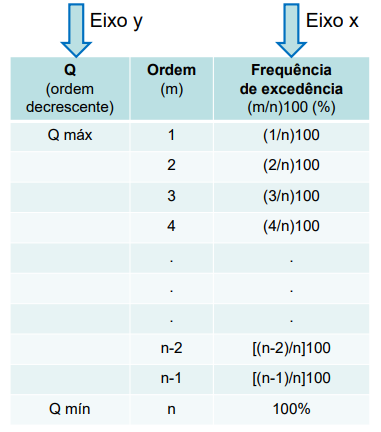

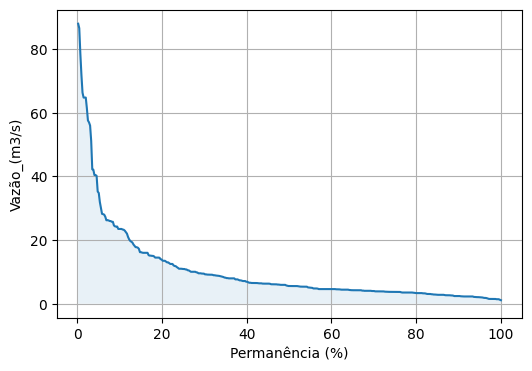

Valor correspondente a 80% da curva de permanência = 3.34 e correspondente a 95% = 2.03


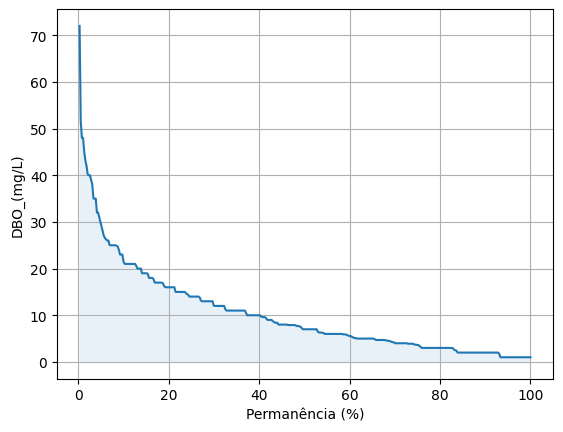

Valor correspondente a 80% da curva de permanência = 3.0 e correspondente a 95% = 1.0


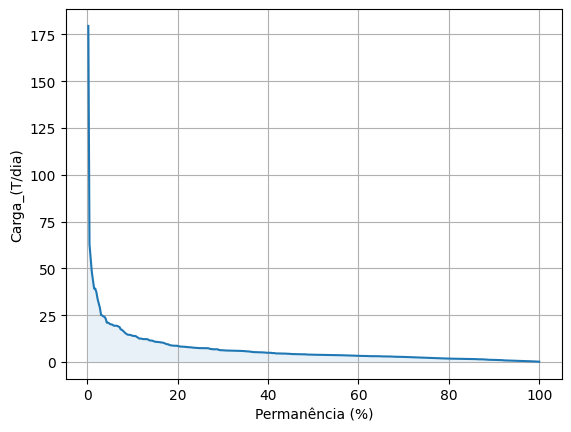

Valor correspondente a 80% da curva de permanência = 1.8023040000000001 e correspondente a 95% = 0.5495040000000001


In [ ]:
def idc_CP(array, parametro):
    diferenca = np.abs(array - parametro)
    idc = np.where(diferenca == np.min(diferenca))[0][0]
    return idc

plt.figure(figsize=(6, 4))  # Definir tamanho da figura

for coluna in df.columns:
  dados_ordenados = np.sort(df[coluna])[::-1]  # Ordenar os dados em ordem decrescente
  porcentagem_acumulada = (np.arange(len(dados_ordenados)) + 1) / len(dados_ordenados) * 100  # Calcular a porcentagem acumulada

  # Plotar a curva de permanência
  plt.plot(porcentagem_acumulada, dados_ordenados, "-")
  plt.xlabel('Permanência (%)')
  plt.ylabel(coluna)
  plt.fill_between(porcentagem_acumulada, dados_ordenados, alpha=0.1)
  plt.grid(True)
  plt.show()

  idc_valor1 = idc_CP(porcentagem_acumulada, 80)
  idc_valor2 = idc_CP(porcentagem_acumulada, 95)
  print('Valor correspondente a 80% da curva de permanência =', dados_ordenados[idc_valor1],
        'e correspondente a 95% =', dados_ordenados[idc_valor2])

## Atendimento a Demanda de Classe

| Permanência | Vazão (m³/s) | DBO (mg/L) | Carga (T/dia) |
| ----------- | ------------ | ---------- |-------------- |
| 80 %        | 3,34         | 3,0        | 1,80          |
| 95 %        | 2,03         | 1,0        | 0,55          |

Um rio de classe 2 tem um limite de concentração de 5 mg/L. É possível apontar que essa concentração tem uma permanência menor que 80%.

Avaliando a curva de permanência da concentração de DBO é possível identificar a permanência associada a esse valor de 5 mg/L, que representa quantos por cento do tempo a concentração desse rio é igual ou maior que 5 mg/L.

In [ ]:
C = 5
dados_ordenados = np.sort(df['DBO_(mg/L)'])[::-1]
porcentagem_acumulada = (np.arange(len(dados_ordenados)) + 1) / len(dados_ordenados) * 100
indice_valor3 = idc_CP(dados_ordenados, C)
print('Permanência(%) de', porcentagem_acumulada[indice_valor3], 'para uma concentração(mg/L) igual a ', C)

Permanência(%) de 61.63682864450127 para uma concentração(mg/L) igual a  5


O resultado mostra que em 61% do tempo a concentração do rio é igual ou maior que 5 mg/L. Este é um resultado alto e demonstra que o rio está longe dos parâmetros para atender a classe 2. É importante frisar que a série de concentração apresentou bastante outlier, de acorodo com a análise do box-plot, e caso fique identificado que esses outliers são possíveis erros do processo de medição (na coleta, laboratório ou armazenamento), esse valor tende a ser menor tornando a tarefa de atendimento a demanda de classe mais fácil.


## Box-Plot
Boxplot é utilizado para avaliar e comparar o formato, tendência central e disperssão da amostra, e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, o intervalo interquartil (IQR) e outliers para cada variável.

Documentação: https://seaborn.pydata.org/generated/seaborn.boxplot.html

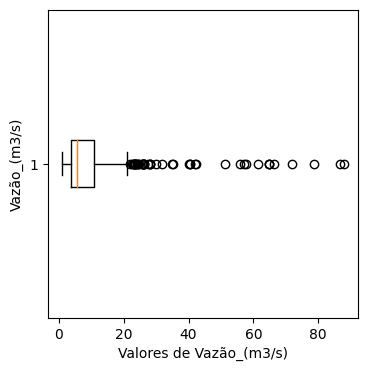

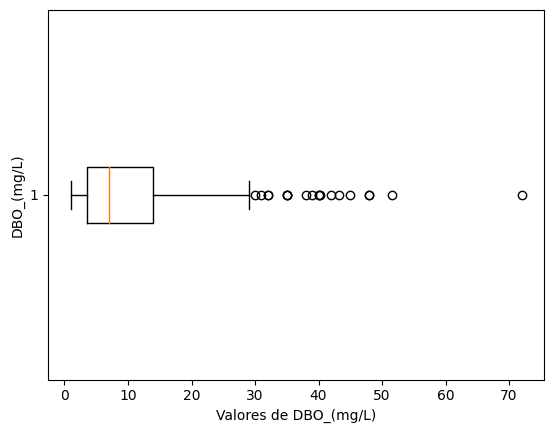

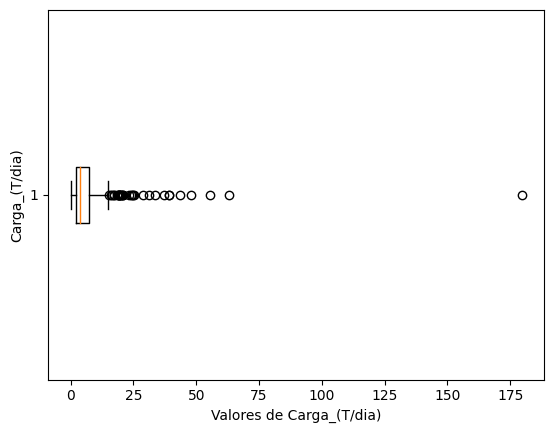

In [ ]:
plt.figure(figsize=(4, 4))  # Definir tamanho da figura

for coluna in df.columns:
    plt.boxplot(df[coluna], vert=False)  # Criar box-plot para cada coluna
    plt.xlabel('Valores de ' + coluna)  # Definir rótulo do eixo x
    plt.ylabel(coluna)  # Definir rótulo do eixo y
    plt.show()  # Mostrar uma figura para cada plot